# Forecasting Time Series

Source video: https://www.youtube.com/watch?v=wqQKFu41FIw <br>
Source code:  https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020/blob/main/notebooks/02_forecasting.ipynb 

In [9]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import sktime
from sklearn.neighbors import KNeighborsRegressor

In [10]:
heartrate_df = pd.read_csv ('.\Data\HEARTRATE_AUTO_1658994387948.csv', sep=',', header=0)

In [11]:
heartrate_df['date'] = pd.to_datetime(heartrate_df['date'],infer_datetime_format=True) #convert from string to datetime
heartrate_df['time'] = pd.to_datetime(heartrate_df['time'], format='%H:%M').dt.strftime("%H:%M")

heartrate_df['date'] = pd.to_datetime(heartrate_df['date'].astype(str)+' '+heartrate_df['time'].astype(str), format='%Y-%m-%d %H:%M')
heartrate_df['date'] = heartrate_df['date'].dt.strftime('%Y-%m-%d %H:%M')
heartrate_df = heartrate_df.drop(columns=['time'])

# generating the indexed dataset
indexed_dataset = heartrate_df.set_index(['date'])

In [12]:
all_values = indexed_dataset.values
# prepare training dataset
train_size = len(heartrate_df) -331
train, test = heartrate_df[0:train_size], heartrate_df[train_size:]

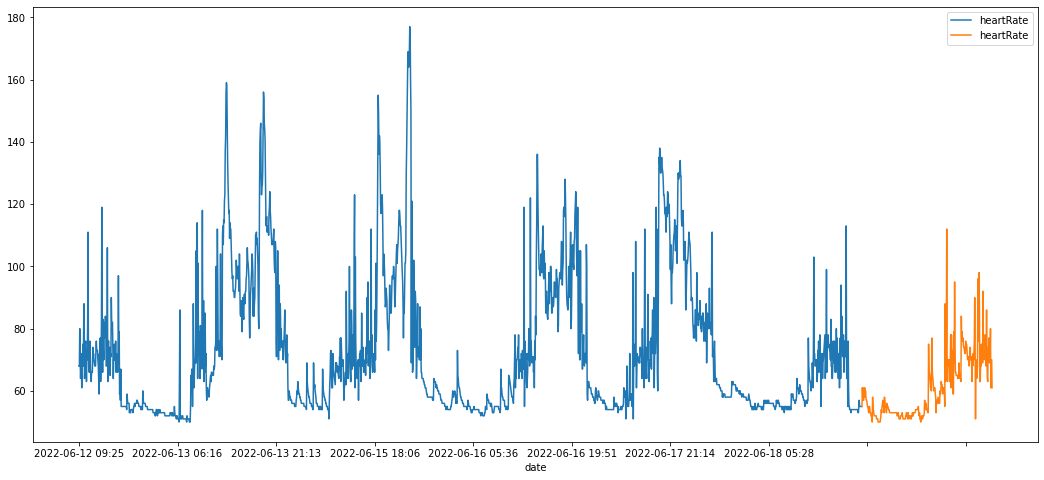

In [13]:
ax = pd.DataFrame(train).plot(figsize=(18,8), x='date')
pd.DataFrame(test).plot(ax=ax)
plt.show()

In [8]:
NaiveForecaster(strategy="seasonal_last", sp=331) #try sp=1
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

NameError: name 'NaiveForecaster' is not defined